In [1]:
import numpy as np
import pandas as pd
import math

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot
from PIL import Image

from sklearn.model_selection import train_test_split

keras.backend.set_image_data_format('channels_last')

# How to train a model:
# https://www.kaggle.com/manthankyada/mnist-digit-classification-cnn-beginner-s-guide
# Image tutorial, matplotlib:
# https://matplotlib.org/tutorials/introductory/images.html

In [2]:
mnist_train = pd.read_csv('train.csv')#----- Train data to be split into X_train, X_test, y_train, y_test
test_dataset = pd.read_csv('test.csv')#----- the new data, which has to be succesfully classified by the _model_

In [3]:
# Spliting the data to X, y           # do take notice that column ['label'] is part of the imported dataset
X = mnist_train.drop('label', axis=1) # and since that column contains the values we want to predict, it is
y = mnist_train['label']              # dropped from X and assigned to y

# Normalize values as good practice
X = X / 255.0
test_dataset = test_dataset / 255.0

In [4]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X = X.values.reshape(-1, 28, 28, 1)
test_dataset = test_dataset.values.reshape(-1, 28, 28, 1)

# Split between train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Get one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#### Thingy to print images, uses max(2, math.ceil()) to prevent errors

In [65]:
def queso(model, X, imgs):
    s = max(2,math.ceil(np.sqrt(imgs)))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(s*2, s*2))
    fig.tight_layout(pad=3.0)
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

## Model from kaggle

In [6]:
# Build a Convolutional Neural Network Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model
model = CNN()

# Source:
# https://www.kaggle.com/manthankyada/mnist-digit-classification-cnn-beginner-s-guide

In [7]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5, verbose=1)

Epoch 1/5
525/525 [==============================] - 51s 97ms/step - loss: 0.0690 - accuracy: 0.9782 - val_loss: 0.0639 - val_accuracy: 0.9802
Epoch 2/5
525/525 [==============================] - 53s 101ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 3/5
525/525 [==============================] - 54s 103ms/step - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 4/5
525/525 [==============================] - 54s 103ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0401 - val_accuracy: 0.9876
Epoch 5/5
525/525 [==============================] - 54s 103ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0365 - val_accuracy: 0.9885


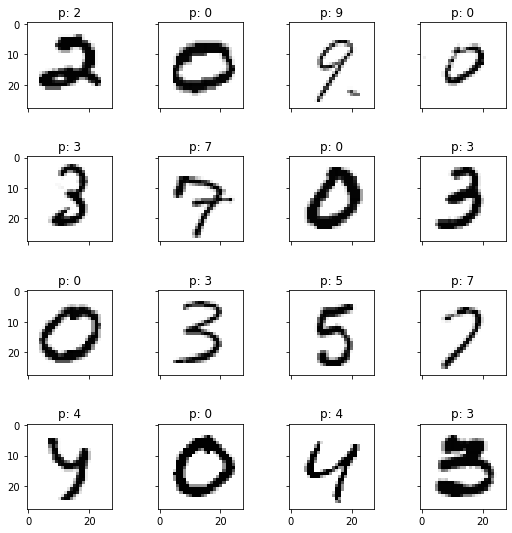

In [75]:
queso(model, test_dataset, 16)

## Model based on stanford class

In [98]:
stan_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 100 neuron hidden layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# source:
# https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=5

In [99]:
stan_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
stan_history = stan_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5, verbose=1)

Epoch 1/5
525/525 [==============================] - 66s 125ms/step - loss: 0.1434 - accuracy: 0.9566 - val_loss: 0.1032 - val_accuracy: 0.9662
Epoch 2/5
525/525 [==============================] - 64s 123ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0760 - val_accuracy: 0.9770
Epoch 3/5
525/525 [==============================] - 64s 122ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0433 - val_accuracy: 0.9874
Epoch 4/5
525/525 [==============================] - 65s 124ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 5/5
525/525 [==============================] - 67s 127ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0612 - val_accuracy: 0.9837


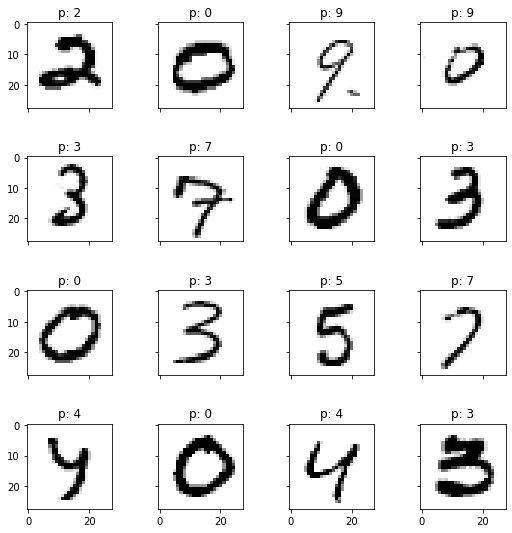

In [101]:
queso(stan_model,test_dataset,16)

## Model from Google I/O in modified form

In [112]:
lm_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3, 3),  activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.05),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3, 3),  activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.1),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# source:
# https://github.com/lmoroney/io19/blob/master/Zero%20to%20Hero/Rock-Paper-Scissors.ipynb
# inspired from video:
# https://www.youtube.com/watch?v=VwVg9jCtqaU

In [113]:
lm_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
lm_history = lm_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5, verbose=1)

Epoch 1/5
525/525 [==============================] - 53s 100ms/step - loss: 0.1756 - accuracy: 0.9423 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 2/5
525/525 [==============================] - 54s 103ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 3/5
525/525 [==============================] - 54s 103ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.0415 - val_accuracy: 0.9870
Epoch 4/5
525/525 [==============================] - 55s 104ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0414 - val_accuracy: 0.9888
Epoch 5/5
525/525 [==============================] - 54s 104ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0655 - val_accuracy: 0.9811


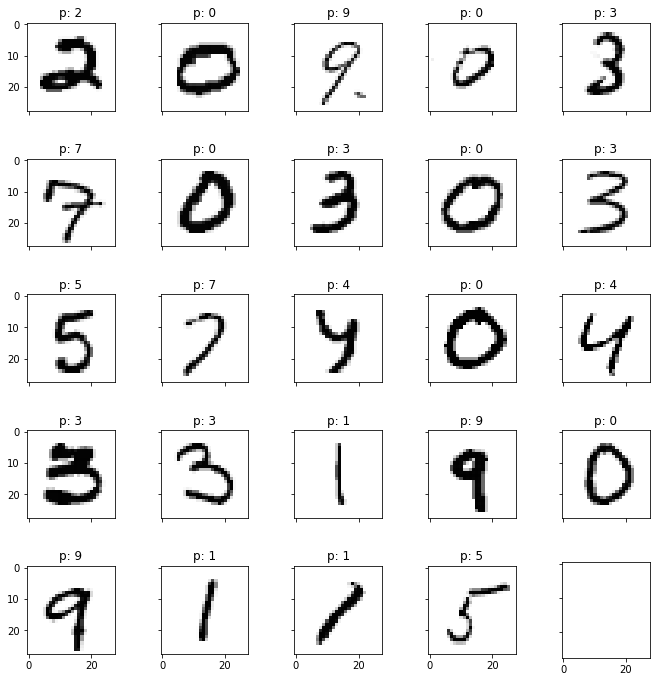

In [117]:
queso(lm_model,test_dataset,24)

## Saving model

In [118]:
# Since the code from google is the one I personally like the best, that is the one trained model I'll be saving

lm_model.save("0-9_classifier_NN.h5")

lm_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 128)       

## Import, grayscale, reshape

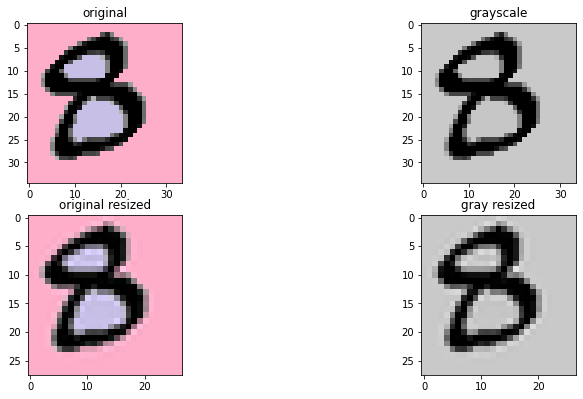

In [97]:
#--------------------------------- LOAD IMAGE
original = Image.open('8.png')
gray = original.convert('LA')
cp_original = original.copy()
cp_gray = gray.copy()
#--------------------------------- NORMAL SIZE
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10, 10))

ax1 = plt.subplot(331)
ax2 = plt.subplot(333)
ax1.imshow(original)
ax1.set_title("original")
ax2.imshow(gray)
ax2.set_title("grayscale")
#--------------------------------- RESIZED
cp_original.thumbnail((28, 28), Image.ANTIALIAS)
cp_gray.thumbnail((28, 28), Image.ANTIALIAS)
ax3 = plt.subplot(334)
ax4 = plt.subplot(336)
ax3.imshow(cp_original)
ax3.set_title("original resized")
ax4.imshow(cp_gray)
ax4.set_title("gray resized")

plt.show()


In [88]:
original.thumbnail((28, 28), Image.ANTIALIAS)
d4_img = np.array(original)
d4_img.shape

(28, 27, 4)

# Next steps:

#### 1. Load ONE vehicle plate number 
#### 2. Identify individual numbers
#### 3. Train lm_model, which was saved as "0-9_classifier_NN.h5", to also identify UPPERCASE LETTERS ONLY